In [1]:
import nltk
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer

In [2]:
from nltk.corpus import stopwords

In [3]:
strategy = pd.read_excel("RAW_FCM__Problems_and_Strategies_7.1.2019.xlsx")
strategy.columns = strategy.iloc[1]
strategy = strategy.iloc[2:]

In [4]:
#strategy.columns

In [5]:
strategy = strategy.rename(columns={'FCM: GRYD Client ID':'ID',
                                    'Description of targeted problem/issue_703': 'Problem',
                                    'Strategy recommended to address this problem_928':'Strategy',
                                    'Progress made? (select one)_934':'Progress'})
strategy = strategy.loc[:,['ID','Problem','Strategy','Progress']]
strategy = strategy.dropna()

In [6]:
strategy.head()

1,ID,Problem,Strategy,Progress
5,77th 1-16-40-2,wants to expunge her record,CM will contact past employers with client to ...,Task/Service successfully completed
6,77th 1-16-45-1,needs a job client is a foster kid and her fos...,speak to teacher about mother and refer client...,Task/Service successfully completed
7,77th 1-16-47-2,has poor grades and want to get better grades,CM will work on getting tutoring services alon...,N/A - not applicable to this phase
8,77th 1-16-50-2,client don't believe in herself,to mentor client with basic life skills and se...,A Little progress
13,77th 1-16-64-1,client has a lot of issues he is a foster kid ...,referred him to in-house services through SEA ...,A Little progress


In [7]:
len(strategy)

4039

Drop not applicable in the **Progress** column

In [8]:
drop = ['N/A - not applicable to this phase']
df = strategy[~strategy['Progress'].isin(drop)]
len(df)

3739

In [9]:
df = strategy

In [10]:
prob_list = df['Problem'].tolist()
prob_list = [s.lower() for s in prob_list]
df['Problem'] = prob_list

In [11]:
df.Problem.value_counts().keys().tolist()

['client requested assistance with employment search',
 'client requires consistent contact from cm/ciw to navagate interpersonal relationships and avoid potential problems with street affiliations',
 'client requires consistent contact with cm/ciw to navagate interpersonal relationships and avoid potential problems with street affiliations',
 'peer pressure',
 'anger issues',
 'client is on probation',
 'unemployed',
 'family issues',
 'client requested assistance with housing search',
 'client is currently on probation.',
 'client requested assistance with job search',
 'client is on probation ',
 'clt does not have ca id. ',
 'client requested assistance exploring postsecondary options',
 'substance abuse',
 'clt is not employed. ',
 'employment',
 'client in need of school support',
 'client is in need of school support',
 'client in need of mentoring ',
 'probation',
 'client requested assistance exploring post secondary options',
 'client needs substance abuse workshops.',
 'sens

In [12]:
for i in range(len(prob_list)):
    if 'employment search' in prob_list[i]:
        prob_list[i] = 'employment related issue'
    elif 'unemployed' in prob_list[i]:
        prob_list[i] = 'employment related issue'
    elif 'job' in prob_list[i]:
        prob_list[i] = 'employment related issue'
    elif 'employment' in prob_list[i]:
        prob_list[i] = 'employment related issue'     
    elif 'not employed' in prob_list[i]:
        prob_list[i] = 'employment related issue'
        

    elif 'postsecondary' in prob_list[i]:
        prob_list[i] = 'postsecondary option'
    elif 'post secondary' in prob_list[i]:
        prob_list[i] = 'postsecondary option'
    
    elif 'navagate interpersonal relationship' in prob_list[i]:
        prob_list[i] = 'navagate interpersonal relationship'
    elif 'navagatre interpersonal relationships' in prob_list[i]:
        prob_list[i] = 'navagate interpersonal relationship'


In [13]:
#drop = ['N/A - not applicable to this phase']
#df = df[~df['To what extent has this strength blossomed? (select one)_916'].isin(drop)]

In [14]:
len(prob_list)

4039

In [15]:
df['Problem'] = prob_list

In [16]:
df.Problem.value_counts()

employment related issue                                                                                                                         595
navagate interpersonal relationship                                                                                                              116
postsecondary option                                                                                                                              28
peer pressure                                                                                                                                     25
anger issues                                                                                                                                      23
                                                                                                                                                ... 
 client tested dirty for marijuana/ uses alcohol occasionally                                             

In [17]:
df_new = df[df['Strategy'] != '40 developmental assets']
len(df_new)

4037

In [18]:
from string import punctuation
from nltk.corpus import wordnet
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.wordnet import WordNetLemmatizer

def get_wordnet_pos(word):
    """Map POS tag to first character lemmatize() accepts"""
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}

    return tag_dict.get(tag, wordnet.NOUN)

In [19]:
def normalize(contents):
    
    for i in range (len(contents)):
        contents[i]=contents[i].replace(",", " ")
    all_contents = [''.join([c for c in i if not c.isdigit()]) for i in contents]
    all_contents = [''.join([c for c in i if c not in punctuation]) for i in contents]
        
    lem_texts = []
    lemmatizer = WordNetLemmatizer()
    for i in all_contents:
        lem_texts.append([lemmatizer.lemmatize(w, get_wordnet_pos(w)) for w in nltk.word_tokenize(i)])
    new_texts = [' '.join([c for c in i]) for i in lem_texts] # a list of lemmatized sentences
    
    clean_tokens = list()
    sw = stopwords.words('english')
    other = ['client','clt','ct','need','request','require','want', 'would', 'like',
             '100', '12','week','13','year','14','18','1yr','20','hr','3yr','check',
             '40','50','70','75','80','10','1012','2018','25','community','hour','30']
    sw = sw + other
    for i in range(0,len(new_texts)):
        clean_tokens.append(' '.join([w for w in word_tokenize(new_texts[i]) if w not in sw]))         
    return clean_tokens # a list of sentences without useless words

In [20]:
normalized_texts = normalize(prob_list)

LookupError: 
**********************************************************************
  Resource [93mpunkt[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('punkt')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mtokenizers/punkt/english.pickle[0m

  Searched in:
    - 'C:\\Users\\chenx/nltk_data'
    - 'C:\\Users\\chenx\\Anaconda3\\nltk_data'
    - 'C:\\Users\\chenx\\Anaconda3\\share\\nltk_data'
    - 'C:\\Users\\chenx\\Anaconda3\\lib\\nltk_data'
    - 'C:\\Users\\chenx\\AppData\\Roaming\\nltk_data'
    - 'C:\\nltk_data'
    - 'D:\\nltk_data'
    - 'E:\\nltk_data'
    - ''
**********************************************************************


In [21]:
normalized_texts

NameError: name 'normalized_texts' is not defined

In [152]:
pd.set_option('display.max_rows', None, 'display.max_columns', None)
normalized_texts[0:10]

['expunge record',
 'job foster kid foster mom take money',
 'poor grade get well grade',
 'dont believe',
 'lot issue foster kid look real mom always thought find sibling',
 'low self esteem',
 'girl drama school gossip cm individual session anger management',
 'mother get fight get kick house move grandparent father parent',
 'jobissue never attend job readiness program',
 'job buy thing school']

In [168]:
tfidf = TfidfVectorizer(min_df=2, max_df=0.8, ngram_range=(1,2))
# features are stored in X
X = tfidf.fit_transform(normalized_texts)

In [169]:
# feature names
terms = tfidf.get_feature_names()

In [170]:
terms

['aa class',
 'abide demand',
 'ability stay',
 'abuse activity',
 'abuse alcohol',
 'abuse class',
 'abuse issue',
 'abuse problem',
 'abuse workshop',
 'academic attendance',
 'academic behavior',
 'academic challenge',
 'academic motivation',
 'academic performance',
 'academic score',
 'access high',
 'accord fight',
 'accord participant',
 'acquire driver',
 'acquire high',
 'acquire work',
 'act impulsively',
 'act know',
 'action caught',
 'action make',
 'active area',
 'active gang',
 'active member',
 'active negative',
 'active tag',
 'activity know',
 'activity life',
 'activity living',
 'admit affiliate',
 'admit drug',
 'adult school',
 'affiliate crew',
 'affiliate friend',
 'affiliate gang',
 'affiliate individual',
 'affiliate local',
 'affiliate member',
 'affiliate peer',
 'afterschool program',
 'age enroll',
 'aggressive parent',
 'alcohol often',
 'alcohol smoke',
 'alcohol use',
 'along family',
 'also influence',
 'also smoking',
 'also substance',
 'altercatio

In [171]:
tfidf_df = pd.DataFrame(X.todense(), 
                        columns=tfidf.get_feature_names())

In [116]:
#tfidf_df.head()

In [172]:
all(tfidf_df.iloc[16,:]==0)

False

In [173]:
row1 = tfidf_df.iloc[16,:]
row1[row1 != 0]

anger management    1.0
Name: 16, dtype: float64

Implementing K means clustering algorithm

In [174]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
from sklearn.manifold import TSNE

Find optimal number of clusters **k**

In [175]:
pca = PCA(n_components=2, random_state=25)
X_reduced= pca.fit_transform(X.toarray())
distortions = []
K = range(3, 10)
for k in K:
    k_means = KMeans(n_clusters=k, random_state=25).fit(X_reduced)
    k_means.fit(X_reduced)
    distortions.append(sum(np.min(cdist(X_reduced, k_means.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0])

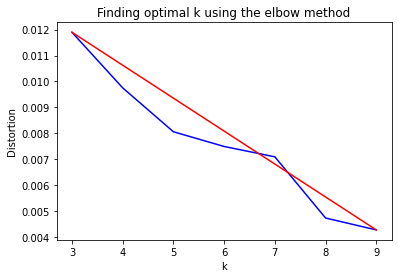

In [176]:
X_line = [K[0], K[-1]]
Y_line = [distortions[0], distortions[-1]]

# plot elbow method
plt.plot(K, distortions, 'b-')
plt.plot(X_line, Y_line, 'r')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('Finding optimal k using the elbow method')
plt.show()

In [177]:
k = 5
model = KMeans(n_clusters=k, init='k-means++', max_iter=1000, n_init=1)
model.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=1000,
       n_clusters=5, n_init=1, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [178]:
tsne = TSNE(verbose=1, perplexity=100, random_state=25)
X_embedded = tsne.fit_transform(X.toarray())

[t-SNE] Computing 301 nearest neighbors...
[t-SNE] Indexed 4039 samples in 0.260s...
[t-SNE] Computed neighbors for 4039 samples in 41.062s...
[t-SNE] Computed conditional probabilities for sample 1000 / 4039
[t-SNE] Computed conditional probabilities for sample 2000 / 4039
[t-SNE] Computed conditional probabilities for sample 3000 / 4039
[t-SNE] Computed conditional probabilities for sample 4000 / 4039
[t-SNE] Computed conditional probabilities for sample 4039 / 4039
[t-SNE] Mean sigma: 0.000000
[t-SNE] KL divergence after 250 iterations with early exaggeration: 70.412460
[t-SNE] KL divergence after 1000 iterations: 1.022204


In [163]:
order_centroids = model.cluster_centers_.argsort()[:, ::-1]

In [125]:
#order_centroids

In [164]:
for i in range(k):
    print("Cluster %d:" % i)
    for ind in order_centroids[i, :8]:
        print(' %s' % terms[ind])

Cluster 0:
 ca id
 currently probation
 complete service
 anger management
 gang member
 life skill
 california id
 school support
Cluster 1:
 substance abuse
 know gang
 school attendance
 enrol school
 easily influence
 local member
 life skill
 work ready document
Cluster 2:
 attend school
 high school
 work ready document
 driver license
 complete probation requirement
 complete service
 consistent contact
 consistent contact cmciw
Cluster 3:
 employment search
 assistance employment
 assistance employment search
 driver license
 complete probation requirement
 complete service
 consistent contact
 consistent contact cmciw
Cluster 4:
 street affiliation
 problem street
 problem street affiliation
 relationship avoid
 interpersonal relationship
 avoid potential
 potential problem
 potential problem street
Cluster 5:
 anger issue
 anger management
 local member
 work ready document
 driver license
 complete service
 consistent contact
 consistent contact cmciw
Cluster 6:
 high school

In [129]:
y_pred = model.fit_predict(X)

In [130]:
len(y_pred)

4039

In [131]:
df['Problem_Classification'] = y_pred
#df.drop('Classification', axis=1, inplace=True)

In [132]:
df.head()

1,ID,Problem,Strategy,Progress,Problem_Classification
5,77th 1-16-40-2,wants to expunge her record,CM will contact past employers with client to ...,Task/Service successfully completed,0
6,77th 1-16-45-1,employment related issue,speak to teacher about mother and refer client...,Task/Service successfully completed,1
7,77th 1-16-47-2,has poor grades and want to get better grades,CM will work on getting tutoring services alon...,N/A - not applicable to this phase,0
8,77th 1-16-50-2,client don't believe in herself,to mentor client with basic life skills and se...,A Little progress,0
13,77th 1-16-64-1,client has a lot of issues he is a foster kid ...,referred him to in-house services through SEA ...,A Little progress,0


In [133]:
#labels = {0:'need service to navagate interpersonal relationship', 1:'need complete service', 
          #2:'employment related issue', 3:'need substance abuse class', 4:'anger issue',
          #5:'gang related issue'}
labels = {0:'employment related issues', 1:'need substance abuse treatement', 
          2:'need help w/ navagating interpersonal relationship', 3:'need id/certificate/document',
          4:'probation issues', 5:'anger issues'}

In [ ]:
# DON'T RUN
labels = {0:"developmental asset", 1:"support/mentor", 2:"get ready for work/school", 
         3: "life skill/anger management", 4:"counseling (employment etc)",
         5:'substance abuse class',
         6: 'sixth',
         7:'seventh'}

In [134]:
df["Problem_Label"] = df["Problem_Classification"].map(labels)

In [135]:
df[0:100]

1,ID,Problem,Strategy,Progress,Problem_Classification,Problem_Label
5,77th 1-16-40-2,wants to expunge her record,CM will contact past employers with client to ...,Task/Service successfully completed,0,employment related issues
6,77th 1-16-45-1,employment related issue,speak to teacher about mother and refer client...,Task/Service successfully completed,1,need substance abuse treatement
7,77th 1-16-47-2,has poor grades and want to get better grades,CM will work on getting tutoring services alon...,N/A - not applicable to this phase,0,employment related issues
8,77th 1-16-50-2,client don't believe in herself,to mentor client with basic life skills and se...,A Little progress,0,employment related issues
13,77th 1-16-64-1,client has a lot of issues he is a foster kid ...,referred him to in-house services through SEA ...,A Little progress,0,employment related issues
15,77th 1-16-81-1,low self esteem,LIFE SKILLS- SELF LOVE,Some progress,0,employment related issues
16,77th 1-16-95-1,client has girl drama at school with gossiping...,One on One Anger Management skills,Task/Service successfully completed,0,employment related issues
19,77th 1-16-110-1,client and mother got into a fight and she got...,refer her to a youth pastor,Good progress,0,employment related issues
21,77th 1-16-114-1,employment related issue,CM will have her start Job Readiness Program i...,Task/Service successfully completed,1,need substance abuse treatement
22,77th 1-16-115-1,employment related issue,Client will join CM Job Readiness Program star...,N/A - not applicable to this phase,1,need substance abuse treatement


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
X_embedded_all = X_embedded

sns.set(rc={'figure.figsize':(10,10)})



color_dict = dict({'need service to navagate interpersonal relationship':'yellow',
                  'need complete service':'forestgreen',
                  'employment related issue': 'orange',
                  'need substance abuse class': 'springgreen',
                  'anger issue': 'dodgerblue',
                   'gang related issue': 'red'})
                  #'sixth':'yellow',
        
                  


sns.scatterplot(X_embedded_all[:,0], X_embedded_all[:,1], hue=df['Problem_Label'].values, legend='full', palette=color_dict)
plt.title('Strategies with {} clusters'.format(k))
plt.show()

In [ ]:
df.to_csv('FCM_Problems_and_Strategies_with_labels8.csv', index=False)

In [ ]:
df['Strategy_Label'].value_counts()